In [81]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [82]:
df = pd.read_csv('BancoDeDados.csv')
df.dropna(inplace=True)
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [83]:
df.columns

Index(['amostra', 'id_cliente', 'id_unico_cliente', 'item_id', 'cep_cliente',
       'cidade_cliente', 'estado_cliente', 'id_pedido', 'status_pedido',
       'horario_pedido', 'pedido_aprovado', 'pedido_entregador',
       'pedido_entregue', 'data_estimada', 'id_vendedor', 'preco', 'frete',
       'pagamento_sequencial', 'pagamento_tipo', 'pagamento_prestacoes',
       'pagamento_valor', 'review', 'categoria', 'categoria_ingles',
       'cep_vendedor', 'cidade_vendedor', 'estado_vendedor'],
      dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114051 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               114051 non-null  int64  
 1   id_cliente            114051 non-null  object 
 2   id_unico_cliente      114051 non-null  object 
 3   item_id               114051 non-null  int64  
 4   cep_cliente           114051 non-null  int64  
 5   cidade_cliente        114051 non-null  object 
 6   estado_cliente        114051 non-null  object 
 7   id_pedido             114051 non-null  object 
 8   status_pedido         114051 non-null  object 
 9   horario_pedido        114051 non-null  object 
 10  pedido_aprovado       114051 non-null  object 
 11  pedido_entregador     114051 non-null  object 
 12  pedido_entregue       114051 non-null  object 
 13  data_estimada         114051 non-null  object 
 14  id_vendedor           114051 non-null  object 
 15  preco

# EDA

In [85]:
def plot_percentual(st, dados):
    plt.figure(figsize=(20,8))
    g = sns.countplot(x = st, data = dados, orient = 'h')
    g.set_ylabel('Contagem', fontsize=17)
    
    sizes = []
    
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x() + p.get_width() / 1.6, height + 200, '{:1.2f}%'.format(height / 116581 * 100), ha = 'center', va = 'bottom', fontsize = 12)
        g.set_ylim(0, max(sizes) * 1.1)

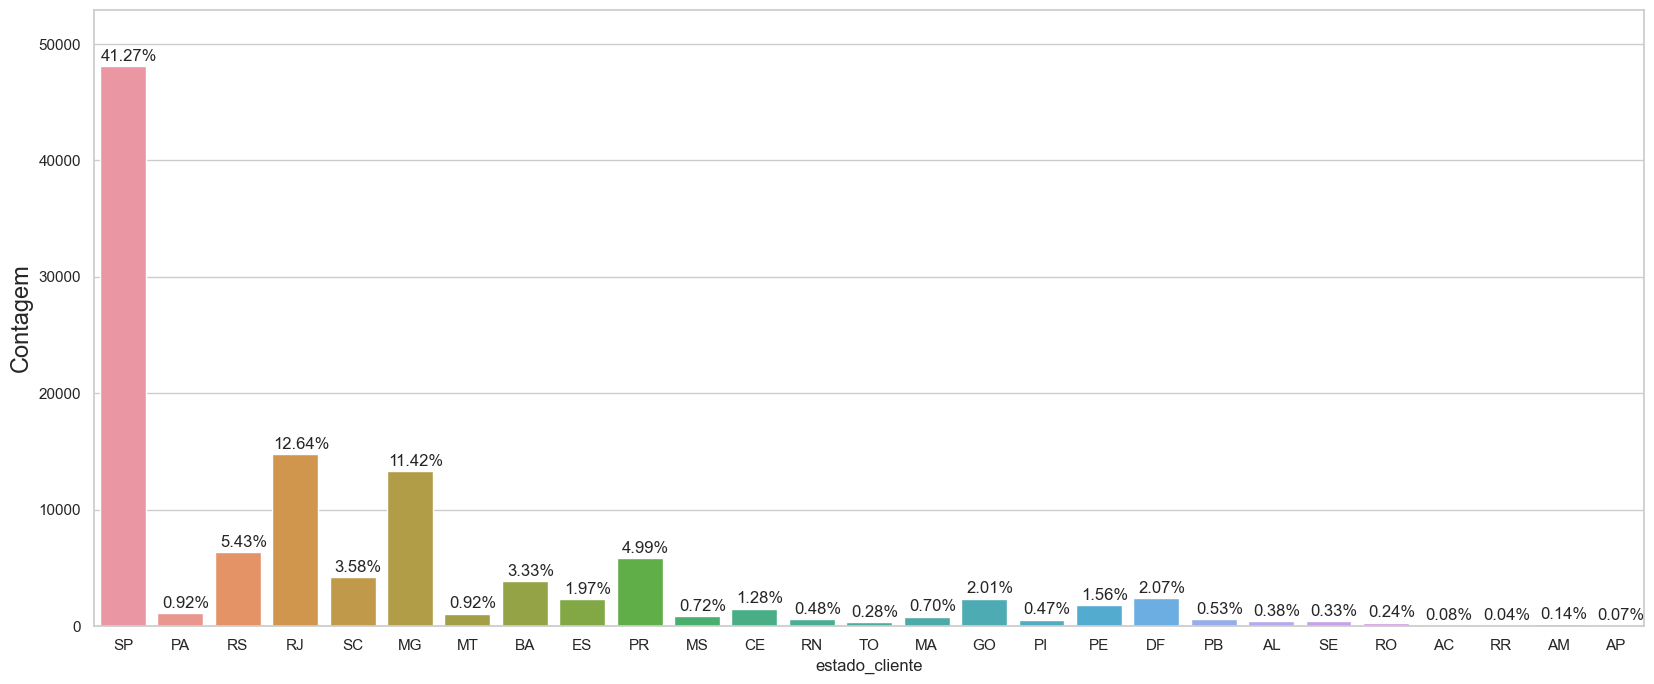

In [86]:
plot_percentual('estado_cliente', df)

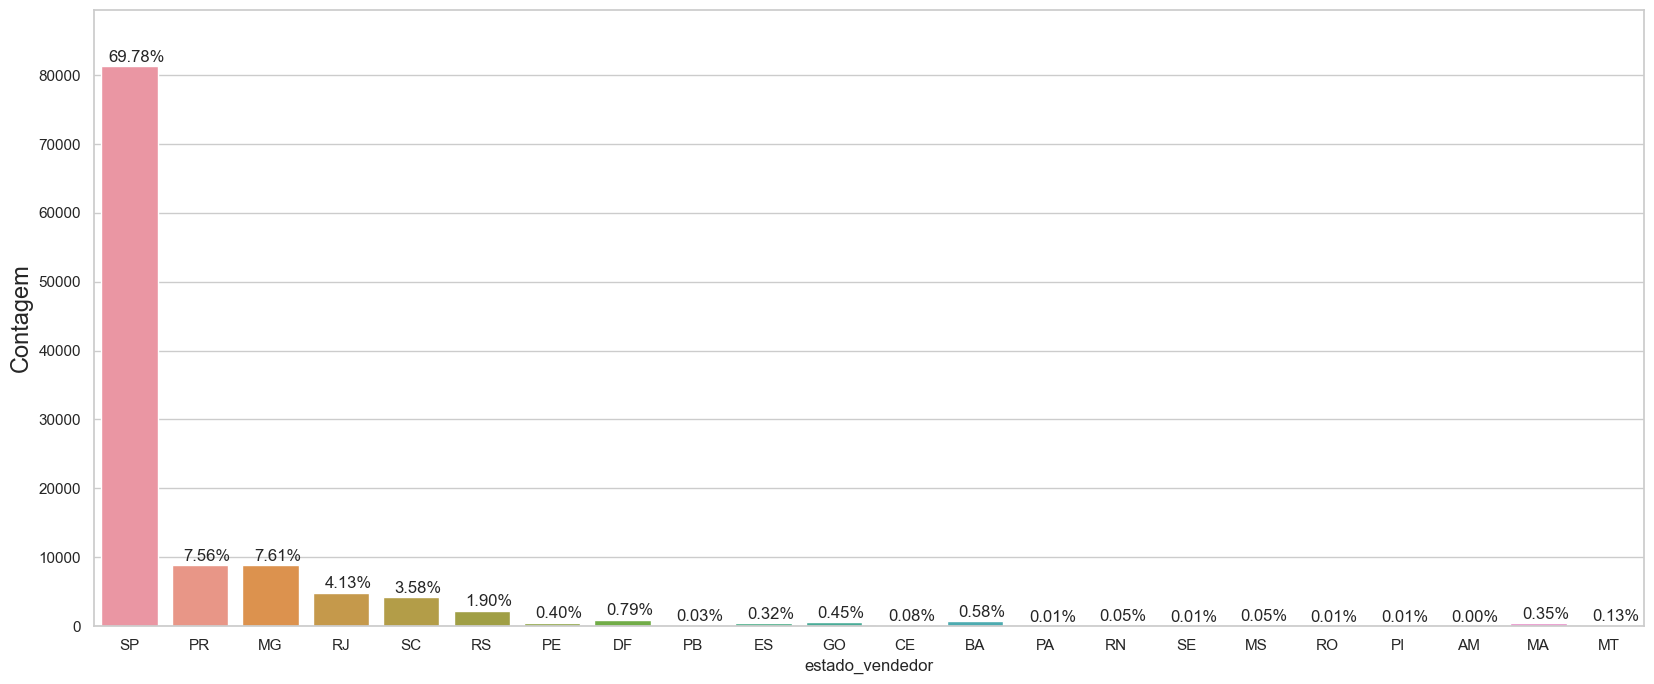

In [87]:
plot_percentual('estado_vendedor', df)

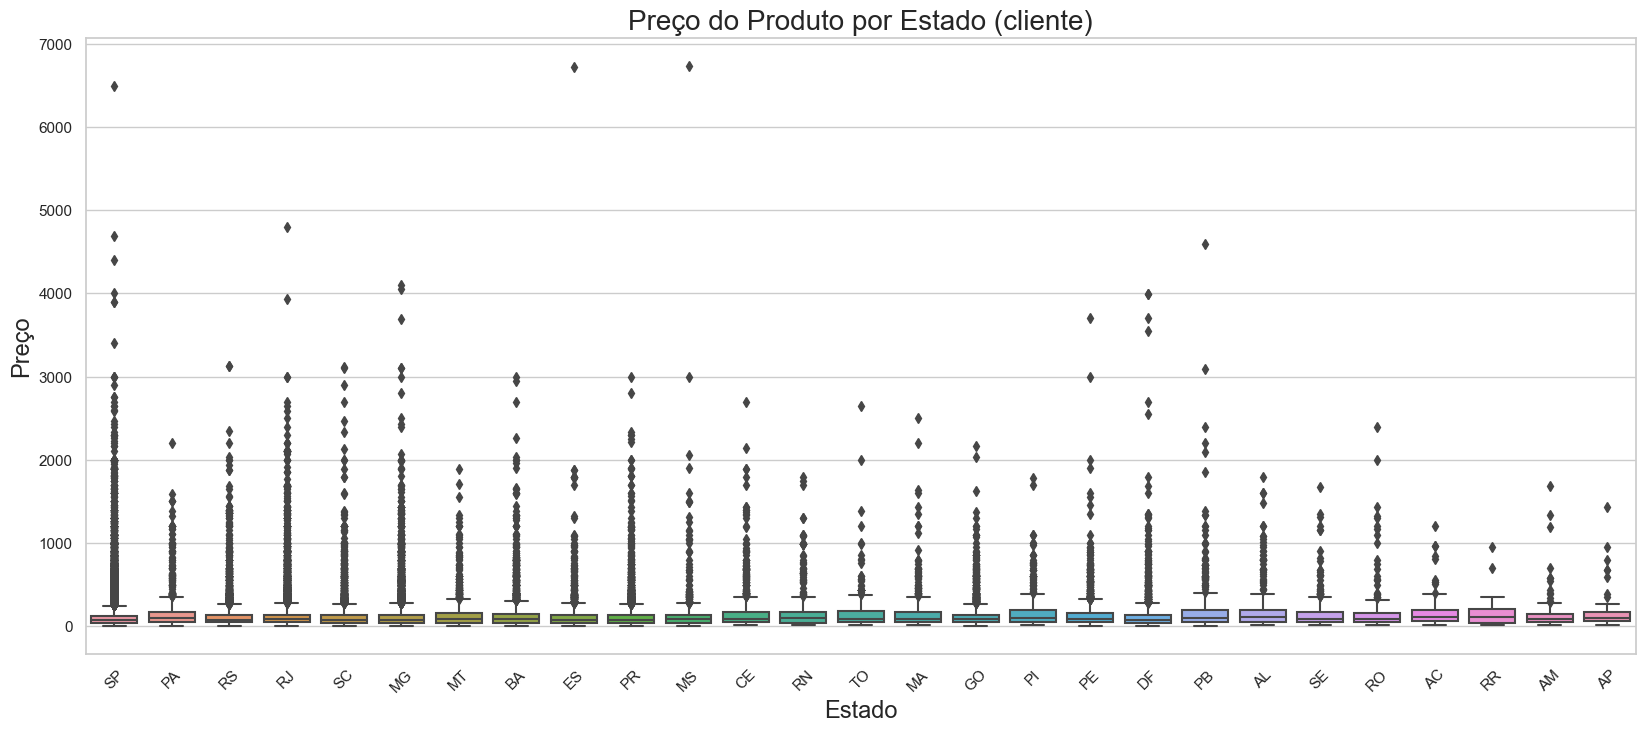

In [88]:
plt.figure(figsize=(20,8))
g2 = sns.boxplot(x='estado_cliente', y='preco',
                 data=df[df['preco'] != -1])
g2.set_title("Preço do Produto por Estado (cliente)", fontsize=20)
g2.set_xlabel("Estado", fontsize=17)
g2.set_ylabel("Preço", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45);

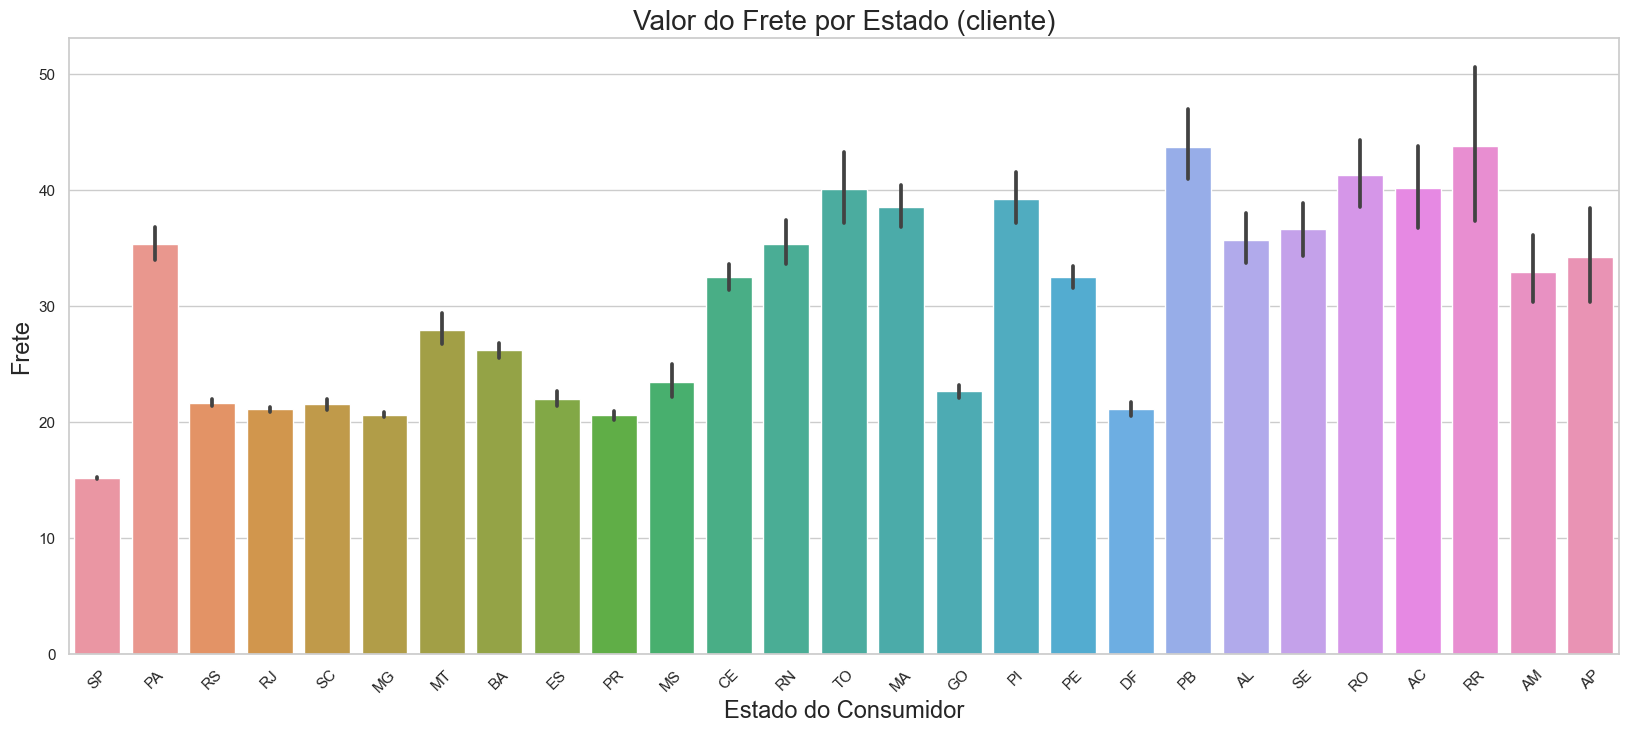

In [89]:
plt.figure(figsize=(20,8))
g3 = sns.barplot(x='estado_cliente', y='frete',
                 data=df[df['preco'] != -1])
g3.set_title("Valor do Frete por Estado (cliente)", fontsize=20)
g3.set_xlabel("Estado do Consumidor", fontsize=17)
g3.set_ylabel("Frete", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45);

- Pode se perceber a falta de vendedores em alguns estados, por exemplo, no Rio de Janeiro, já em outros estados se tivesse mais vendedores o valor do frete poderia ser menor pelo fato da compra ter sido dentro do próprio estado e também podemos diminuir os atrasos

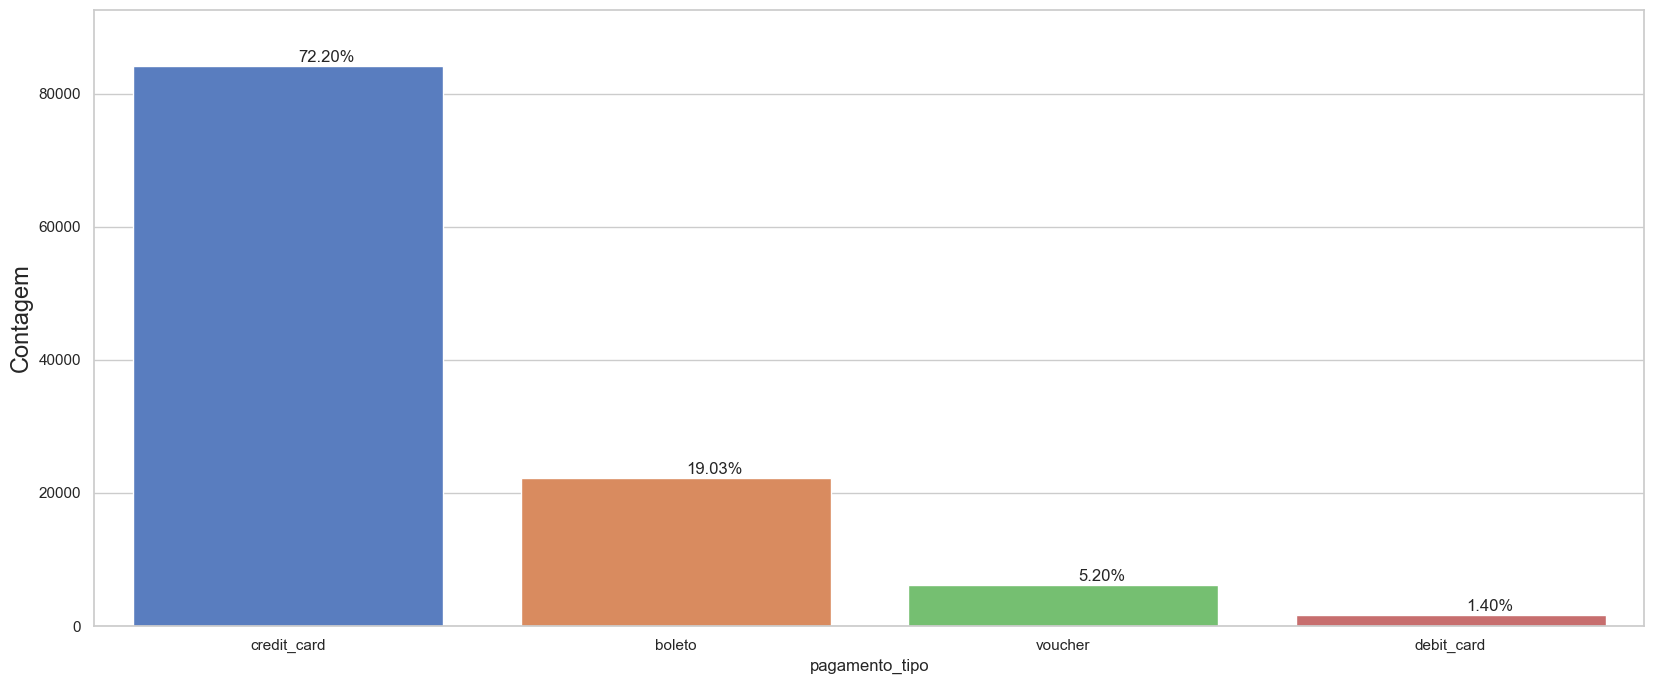

In [90]:
plot_percentual('pagamento_tipo', df)

- A maioria dos clientes realiza compras por cartão de crédito, posteriormente por boleto, voucher e cartão de débito. Seria interessante aumentar as promoções para pagamento à vista (para aumento dos pagamentos com boleto ou cartão de débito).
- Também percebe-se que a maioria dos vendedores e compradores estão em SP.

In [91]:
data = []
for i in df['pedido_entregue']:
    i = str(i)
    data.append(i[:10])
        
df['pedido_entregue'] = data      

In [92]:
data = []
for i in df['pedido_aprovado']:
    i = str(i)
    data.append(i[:10])
        
df['pedido_aprovado'] = data     

## Criação de Features

In [93]:
df['pedido_aprovado'] = pd.to_datetime(df['pedido_aprovado'], format='%Y-%m-%d')
df['pedido_entregue'] = pd.to_datetime(df['pedido_entregue'], format='%Y-%m-%d')
df['data_estimada'] = pd.to_datetime(df['data_estimada'], format='%Y-%m-%d %H:%M:%S')

In [94]:
df['atraso_entrega'] = df['data_estimada'] - df['pedido_entregue']
df['tempo_entrega'] = df['pedido_entregue'] -df['pedido_aprovado']

In [95]:
df['tempo_entrega'] = df['tempo_entrega'].dt.days.astype('int')
df['tempo_entrega'].value_counts()
df['tempo_entrega']

0          9
1         18
2         18
3         18
4         24
          ..
116576     3
116577     3
116578     3
116579     5
116580     4
Name: tempo_entrega, Length: 114051, dtype: int32

In [96]:
df['atraso_entrega'] = df['atraso_entrega'].dt.days.astype('int')
df['atraso_entrega'].value_counts()

atraso_entrega
 14     8477
 13     7017
 15     6328
 7      5696
 8      5646
        ... 
 67        1
-106       1
 140       1
-67        1
-72        1
Name: count, Length: 196, dtype: int64

In [97]:
atraso = []
for i in df['atraso_entrega']:
    if i >= 0:
        atraso.append(0)
    else:
        atraso.append(1)
        
df['atraso'] = atraso        

In [98]:
atraso = []
for i in df['atraso_entrega']:
    if i >= 0:
        atraso.append(0)
    else:
        atraso.append(abs(i))
        
df['atraso_entrega'] = atraso  

In [99]:
df[['pedido_entregue', 'data_estimada', 'review', 'categoria', 'preco', 'frete', 'atraso']]

,pedido_entregue,data_estimada,review,categoria,preco,frete,atraso
0,2017-05-25,2017-06-05,4,moveis_escritorio,124.99,21.88,0
1,2017-11-28,2017-12-19,1,moveis_escritorio,112.99,24.90,0
2,2017-11-28,2017-12-19,1,moveis_escritorio,112.99,24.90,0
3,2017-05-26,2017-06-12,3,moveis_escritorio,124.99,15.62,0
4,2018-02-28,2018-03-22,4,moveis_escritorio,106.99,30.59,0
...,...,...,...,...,...,...,...
116576,2018-08-24,2018-09-06,5,artes_e_artesanato,289.49,24.83,0
116577,2018-07-27,2018-08-06,3,artes_e_artesanato,19.00,12.86,0
116578,2018-07-27,2018-08-06,3,artes_e_artesanato,39.90,12.87,0
116579,2018-08-03,2018-08-16,5,artes_e_artesanato,57.90,19.60,0


In [100]:
df[['tempo_entrega','pedido_entregue', 'data_estimada', 'review','preco', 'frete', 'atraso','atraso_entrega']].corr()

,tempo_entrega,pedido_entregue,data_estimada,review,preco,frete,atraso,atraso_entrega
tempo_entrega,1.000000,-0.043424,-0.083595,-0.303425,0.060546,0.211406,0.598035,0.692841
pedido_entregue,-0.043424,1.000000,0.997779,-0.018607,0.002691,0.059969,0.068312,0.036456
data_estimada,-0.083595,0.997779,1.000000,-0.003310,0.002909,0.063081,0.029257,-0.006137
review,-0.303425,-0.018607,-0.003310,1.000000,0.001964,-0.034315,-0.355392,-0.235902
preco,0.060546,0.002691,0.002909,0.001964,1.000000,0.414930,0.023980,0.020151
frete,0.211406,0.059969,0.063081,-0.034315,0.414930,1.000000,0.047647,0.037063
atraso,0.598035,0.068312,0.029257,-0.355392,0.023980,0.047647,1.000000,0.573590
atraso_entrega,0.692841,0.036456,-0.006137,-0.235902,0.020151,0.037063,0.573590,1.000000


1. Correlação do tempo de entrega:

        Correlação positiva com atraso (0.598): O tempo de entrega está fortemente correlacionado com o atraso, o que faz sentido. Quanto maior o tempo de entrega, mais provável é que o pedido esteja atrasado.
        
        Correlação negativa com review (-0.303): Uma correlação moderadamente negativa entre tempo de entrega e review sugere que tempos de entrega mais longos tendem a estar associados a avaliações (reviews) mais baixas.
        
2. Correlação do atraso:

        Correlação positiva com tempo de entrega (0.598): Isso indica que quanto mais longo o tempo de entrega, maior a probabilidade de haver atraso, como era de se esperar.
        
        Correlação negativa com review (-0.355): Quanto maior o atraso, pior tende a ser a avaliação do cliente.

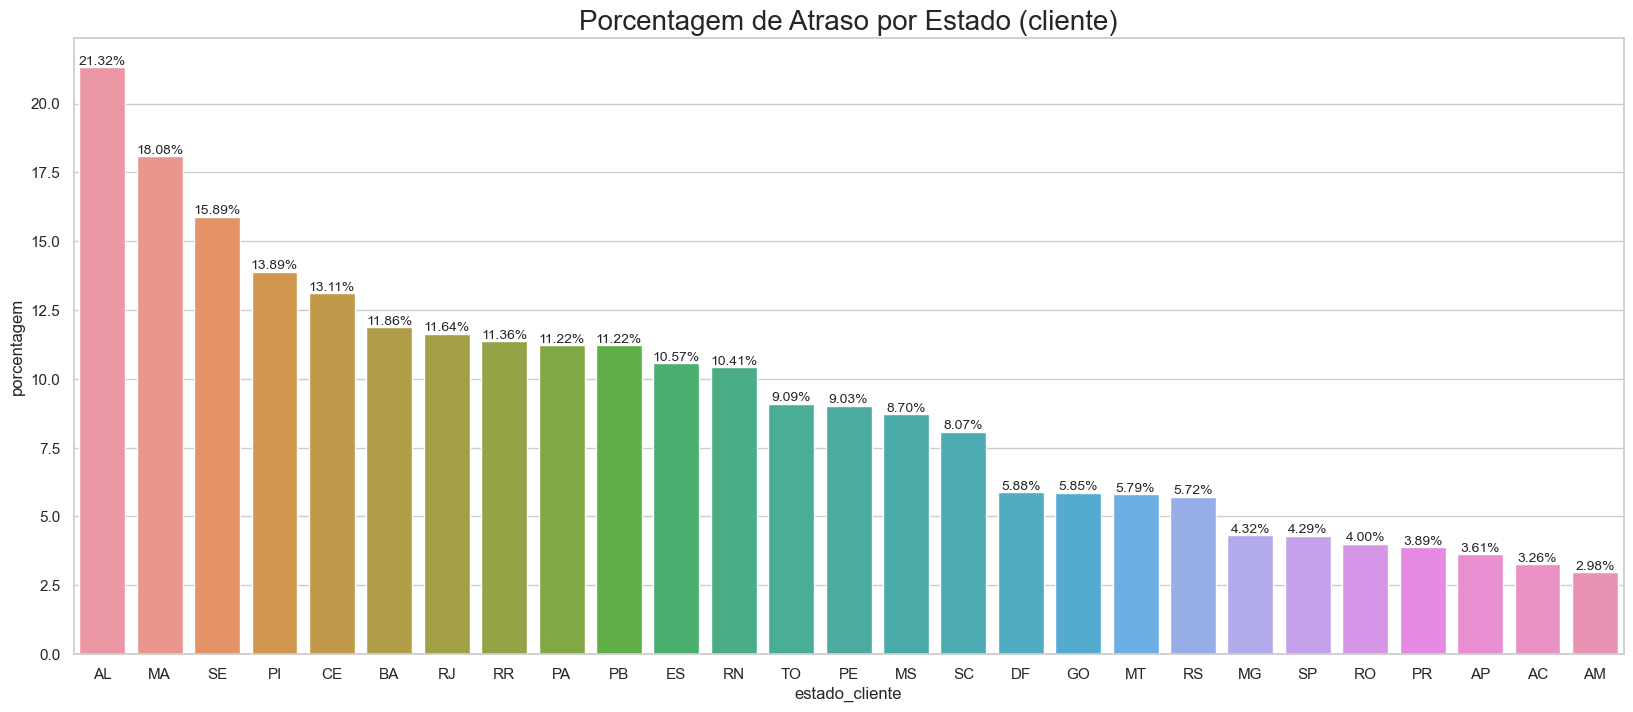

In [101]:
porcentagem = (df.groupby(['estado_cliente', 'atraso'])['atraso'].count() / df.groupby(['estado_cliente', 'atraso'])['atraso'].count().groupby(level=0).sum() * 100).reset_index(name='porcentagem')
porcentagem_df = pd.DataFrame(porcentagem)
atraso_df = porcentagem_df[porcentagem_df['atraso'] == 1].sort_values('porcentagem', ascending=False)
plt.figure(figsize=(20,8))
ax = sns.barplot(atraso_df, x="estado_cliente", y="porcentagem")
ax.set_title("Porcentagem de Atraso por Estado (cliente)", fontsize=20)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', fontsize=10)

plt.show()

O atraso pode estar relacionado a quantidade de entregadores?? Quanto menos entregadores no estado, mais atraso??

In [102]:
media_frete = df.groupby(['estado_cliente'])['frete'].mean().values
media_preco = df.groupby(['estado_cliente'])['preco'].mean().values
media_entrega = df.groupby(['estado_cliente'])['tempo_entrega'].mean().values

In [103]:
quant_atraso = df.groupby(['estado_cliente', 'atraso'])['atraso'].count().reset_index(name='quantidade')
quant_atraso = quant_atraso[quant_atraso['atraso']==1]
quant_atraso['media_frete'] = media_frete
quant_atraso['media_preco'] = media_preco
quant_atraso['media_entrega'] = media_entrega
quant_atraso.drop('atraso', axis=1, inplace=True)

In [104]:
atraso_df.drop('atraso', axis=1, inplace=True)

In [105]:
atraso_df= atraso_df.merge(quant_atraso, on='estado_cliente')
atraso_df

,estado_cliente,porcentagem,quantidade,media_frete,media_preco,media_entrega
0,AL,21.315193,94,35.723583,184.308957,23.984127
1,MA,18.081181,147,38.510726,145.991292,20.926199
2,SE,15.885417,61,36.647135,152.081302,20.846354
3,PI,13.893967,76,39.215923,163.392066,18.729433
4,CE,13.113652,195,32.523295,154.340363,20.119704
5,BA,11.861784,460,26.178592,132.886712,18.600825
6,RJ,11.638165,1715,21.105210,124.128208,14.709080
7,RR,11.363636,5,43.777500,154.806591,27.681818
8,PA,11.224490,121,35.316234,158.515260,23.106679
9,PB,11.219512,69,43.694472,192.506423,19.930081


## Estados com maior porcentagem de atraso:

* Alagoas (AL) apresenta a maior porcentagem de atraso, com 21,3%, seguido por Maranhão (MA) com 18,1% e Sergipe (SE) com 15,9%. Esses estados podem ter desafios logísticos que causam atrasos mais frequentes, como dificuldade de acesso logístico, infraestrutura limitada, ou rotas menos otimizadas.


## Média do frete:

* Estados como Roraima (RR) e Paraíba (PB) apresentam fretes significativamente mais altos (43,77 e 43,69, respectivamente), possivelmente devido à distância e dificuldades de acesso. Isso indica que regiões mais distantes ou com menos infraestrutura tendem a ter custos de frete maiores, o que pode estar relacionado aos atrasos observados.
* Estados com fretes mais baixos, como Minas Gerais (MG) e São Paulo (SP), tendem a ter menos atrasos, sugerindo que a proximidade de grandes centros e uma infraestrutura logística eficiente podem ajudar a reduzir tanto os custos de frete quanto os atrasos.

## Média de preço dos produtos:

* Os estados com os produtos de maior preço médio são Alagoas (AL) (184,30) e Acre (AC) (184,13), enquanto estados como São Paulo (SP) e Minas Gerais (MG) têm produtos com preços médios mais baixos (109,42 e 119,68, respectivamente). Isso pode indicar uma relação indireta entre regiões mais afastadas e o preço dos produtos, talvez devido à oferta limitada e maior custo de transporte.

## Tempo médio de entrega:

* São Paulo (SP) se destaca por ter o menor tempo médio de entrega (8,18 dias), seguido por Minas Gerais (MG) (11,39 dias) e Paraná (PR) (11,36 dias), o que reflete a eficiência logística em grandes centros urbanos e regiões próximas. Esses estados também possuem as menores porcentagens de atraso.
* Em contraste, estados como Roraima (RR), Amapá (AP), e Amazonas (AM) apresentam tempos médios de entrega muito maiores (27,68 dias, 27,33 dias e 25,94 dias, respectivamente), indicando que a distância geográfica e dificuldades logísticas impactam significativamente o tempo de entrega e podem estar contribuindo para a maior porcentagem de atrasos.

## Relação entre frete, preço e atraso:

* Em geral, regiões com fretes mais altos também têm tempos de entrega mais longos e maiores porcentagens de atraso (como RR, PB, TO e AP). Isso pode indicar que as dificuldades logísticas em regiões mais distantes estão impactando tanto o custo de transporte quanto a pontualidade das entregas.

## Impacto da distância e infraestrutura:

* Estados mais próximos de grandes centros logísticos (como SP, MG e RJ) apresentam menor porcentagem de atraso e menores tempos de entrega, sugerindo que a proximidade com centros de distribuição e melhor infraestrutura rodoviária ou aeroportuária desempenham um papel importante na eficiência logística.

## Conclusão:
* Problemas logísticos regionais: Estados mais distantes ou com infraestrutura logística mais limitada (como RR, AM, AP) sofrem com fretes mais caros, tempos de entrega mais longos e maior incidência de atrasos.
* Grandes centros logísticos: Estados próximos a grandes centros econômicos e logísticos (como SP, MG e RJ) conseguem manter uma eficiência logística melhor, com menor tempo de entrega e menores porcentagens de atraso.
* Oportunidades de melhoria: Investimentos em infraestrutura e otimização logística em estados com alta porcentagem de atrasos, como AL, MA e SE, podem ajudar a reduzir os atrasos e melhorar a experiência do cliente.

In [106]:
df['horario_pedido'] = pd.to_datetime(df['horario_pedido'])

df['ano'] = df['horario_pedido'].dt.year
df['mes'] = df['horario_pedido'].dt.month
df['dia'] = df['horario_pedido'].dt.day
df['dia_da_semana'] = df['horario_pedido'].dt.weekday

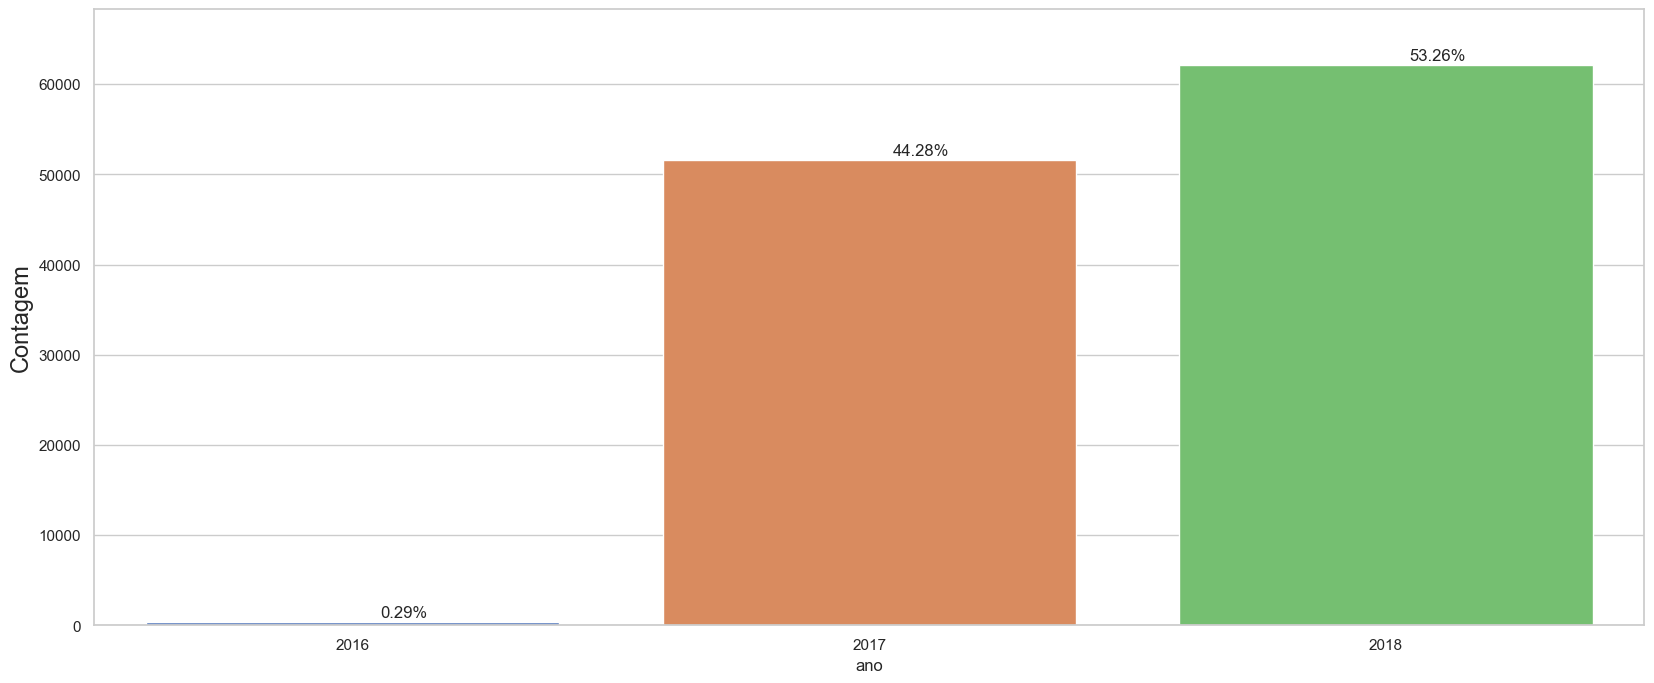

In [107]:
plot_percentual('ano', df)

- Percebe-se o aumento de vendas a cada ano

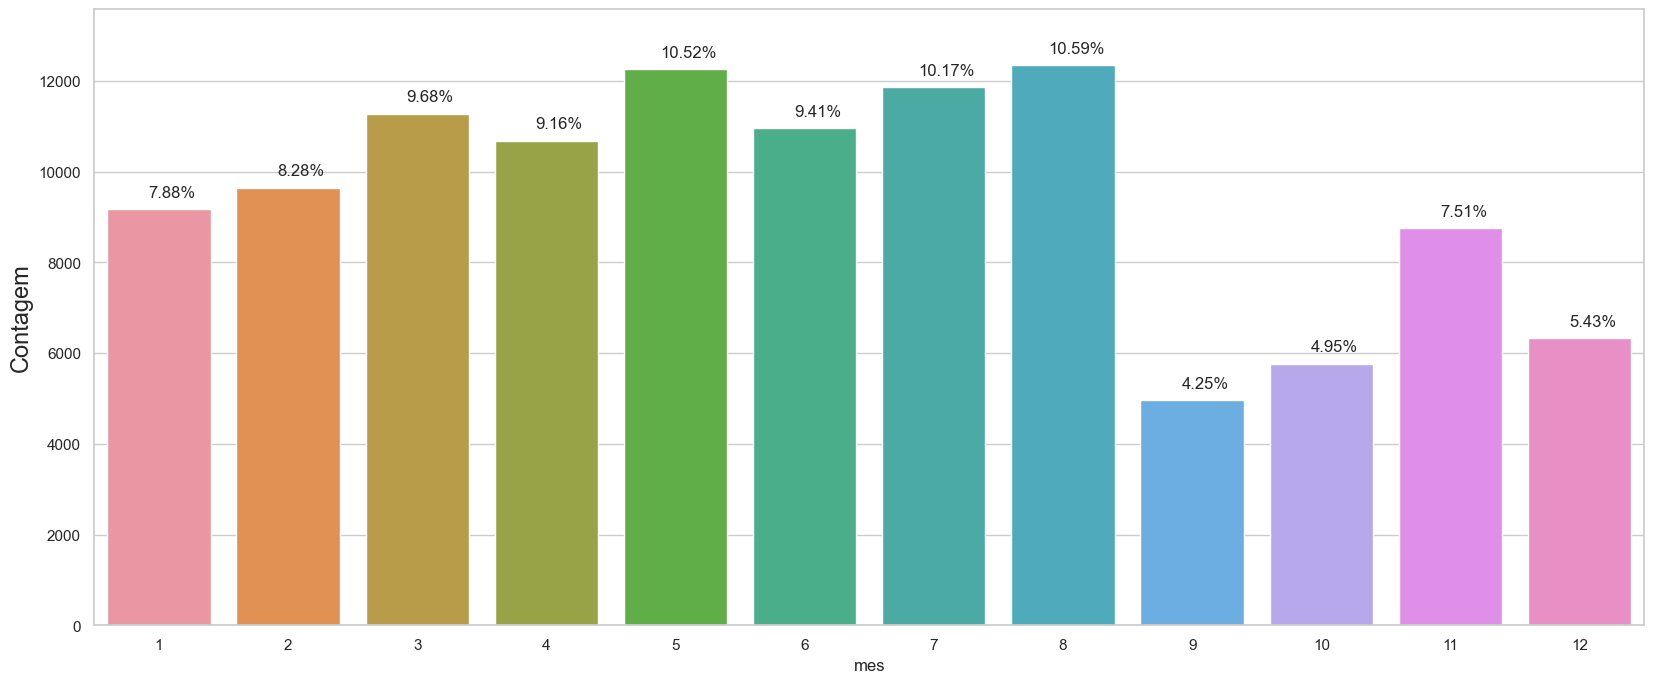

In [108]:
plot_percentual('mes', df)

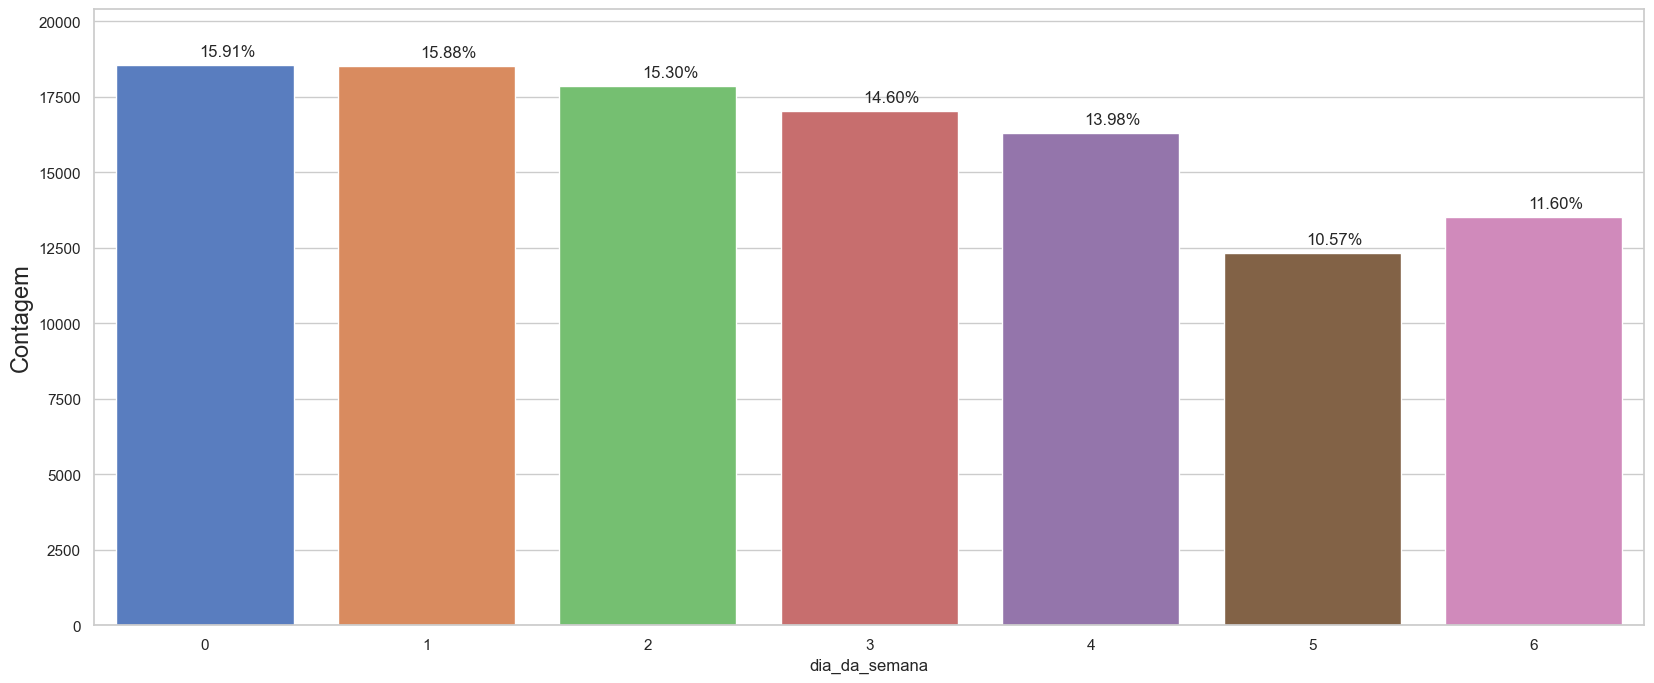

In [109]:
plot_percentual('dia_da_semana', df)

- Início da semana sempre com mais vendas

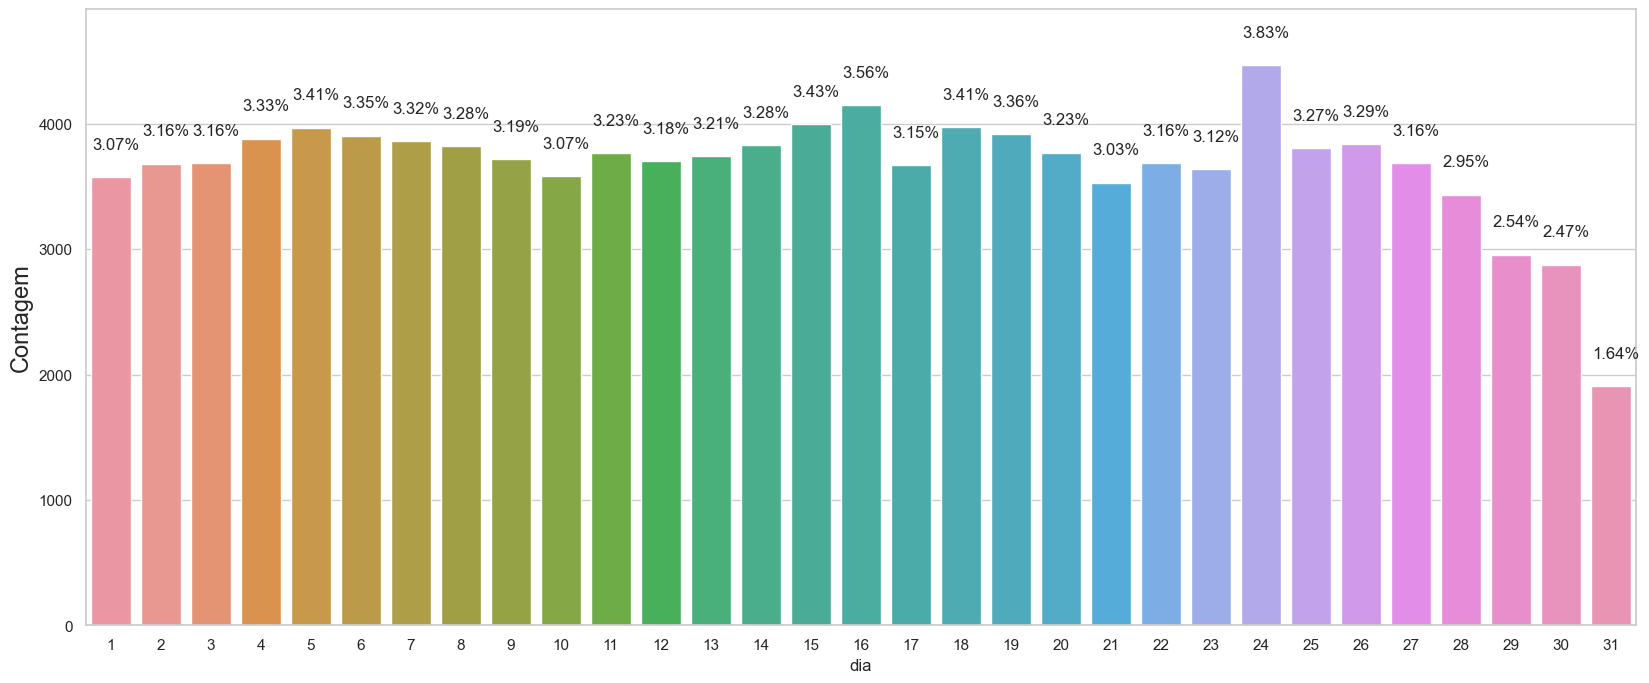

In [110]:
plot_percentual('dia', df)

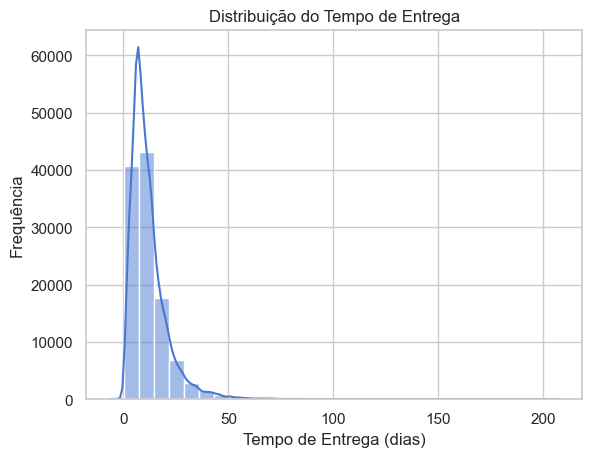

In [111]:
# Visualização
sns.histplot(df['tempo_entrega'].dropna(), bins=30, kde=True)
plt.title('Distribuição do Tempo de Entrega')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Frequência')
plt.show()

In [112]:
df_olist = df[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]

In [113]:
df_compra = df.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_unico_cliente', 'DataMaxCompra']
df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra'])

In [114]:
df_compra["Recencia"] = (df_compra['DataMaxCompra'].max() - df_compra['DataMaxCompra']).dt.days


In [115]:
df_usuario = pd.merge(df_olist, df_compra[['id_unico_cliente','Recencia']], on='id_unico_cliente')
df_usuario

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,469
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,293
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,293
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,478
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,206
...,...,...,...,...,...,...
114046,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,8
114047,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,36
114048,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,36
114049,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,31


## Usando o método de cotovelo para definição do melhor número de cluster

In [116]:
def calcular_wcss(data):
    wcss=[]
    for k in range(1,10):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X=data)
        data['Clusters'] = kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

In [117]:
from sklearn.cluster import KMeans
df_recencia = df_usuario[['Recencia']]

In [118]:
soma_quadrados = calcular_wcss(df_recencia)

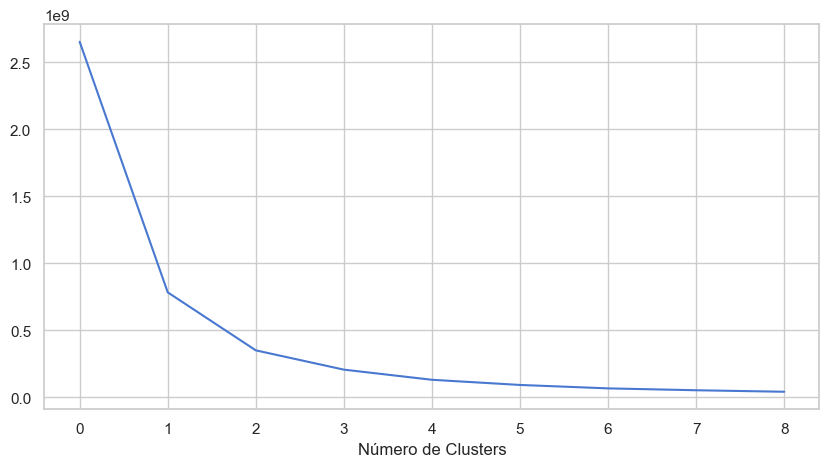

In [119]:
plt.figure(figsize=(10,5))
plt.plot(soma_quadrados)
plt.xlabel('Número de Clusters')
plt.show()

In [120]:
import math

def numero_otimo_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss) - 1]
    
    distancia = []
    for i in range(len(wcss)):
        x0 = i + 2
        y0 = wcss[i]
        numerador = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
        denominador = math.sqrt ((y2 - y1) ** 2 + (x2 - x1) ** 2)
        distancia.append(numerador/denominador)
    return distancia.index(max(distancia)) + 2

In [121]:
n = numero_otimo_clusters(soma_quadrados)
n

4

In [122]:
kmeans = KMeans(n_clusters=4)
df_usuario['RecenciaCluster'] = kmeans.fit_predict(df_recencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,469,2
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,293,1
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,293,1
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,478,2
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,206,3


In [123]:
#função para ordenar o número de clusters 
def ordenar_cluster(cluster_nome, target_nome,df,ascending):
    novo_nome = 'novo' + cluster_nome
    agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target_nome,
                                                                     ascending=ascending).reset_index(drop=True)
    agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
    juntando_cluster = pd.merge(df,agrupado_por_cluster_ordenado[[cluster_nome,'index']], on=cluster_nome)
    removendo_dados = juntando_cluster.drop([cluster_nome],axis=1)
    df_final = removendo_dados.rename(columns={"index":cluster_nome})
    return df_final

df_usuario = ordenar_cluster('RecenciaCluster', 'Recencia',df_usuario,False)

In [124]:
df_usuario.groupby('RecenciaCluster')['Recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
RecenciaCluster,,,,,,,,
0,20025.0,483.344320,59.347679,399.0,436.0,474.0,526.0,694.0
1,29919.0,313.991444,43.259990,249.0,276.0,307.0,351.0,398.0
2,32871.0,182.804904,35.031650,123.0,153.0,182.0,213.0,248.0
3,31236.0,62.025195,35.913007,0.0,29.0,62.0,95.0,122.0


In [125]:
df_frequencia = df.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
df_frequencia.columns = ['id_unico_cliente', 'Frequencia']

df_usuario = pd.merge(df_usuario, df_frequencia, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,469,0,1
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,293,1,2
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,293,1,2
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,478,0,1
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,206,2,1


In [126]:
df_frequencia = df_usuario[['Frequencia']]
kmeans = KMeans(n_clusters=4)
df_usuario['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,469,0,1,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,293,1,2,0
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,293,1,2,0
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,478,0,1,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,206,2,1,0


In [127]:
df_usuario.groupby(['FrequenciaCluster'])['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,104304.0,1.306968,0.570920,1.0,1.0,1.0,2.0,3.0
1,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0
2,8971.0,5.647197,2.152087,4.0,4.0,5.0,6.0,13.0
3,701.0,21.168331,6.561591,14.0,15.0,21.0,24.0,38.0


In [128]:
df_usuario = ordenar_cluster('FrequenciaCluster','Frequencia', df_usuario, True)
df_usuario.groupby(['FrequenciaCluster'])['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,104304.0,1.306968,0.570920,1.0,1.0,1.0,2.0,3.0
1,8971.0,5.647197,2.152087,4.0,4.0,5.0,6.0,13.0
2,701.0,21.168331,6.561591,14.0,15.0,21.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


In [129]:
df_receita = df.groupby(['id_unico_cliente']).pagamento_valor.sum().reset_index()
df_receita.columns = ['id_unico_cliente', 'Receita']
df_usuario = pd.merge(df_usuario, df_receita, on='id_unico_cliente')

In [130]:
df_pagamento = df_usuario[['Receita']]
kmeans = KMeans(n_clusters=4)
df_usuario['ReceitaCluster'] = kmeans.fit_predict(df_pagamento)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,469,0,1,0,146.87,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,293,1,2,0,551.58,0
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,293,1,2,0,551.58,0
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,478,0,1,0,140.61,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,206,2,1,0,137.58,0


In [131]:
df_usuario.groupby(['ReceitaCluster'])['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,112195.0,255.376566,356.971153,9.59,69.73,132.04,267.57,2828.42
1,199.0,26914.634523,10065.864450,16313.60,19167.26,22346.60,30186.00,45256.00
2,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64
3,1649.0,5417.886725,2744.335276,2836.80,3420.36,4250.00,6579.50,14963.64


In [132]:
df_usuario = ordenar_cluster('ReceitaCluster','Receita', df_usuario, True)
df_usuario.groupby(['ReceitaCluster'])['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,112195.0,255.376566,356.971153,9.59,69.73,132.04,267.57,2828.42
1,1649.0,5417.886725,2744.335276,2836.80,3420.36,4250.00,6579.50,14963.64
2,199.0,26914.634523,10065.864450,16313.60,19167.26,22346.60,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


In [133]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,469,0,1,0,146.87,0
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,293,1,2,0,551.58,0
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,293,1,2,0,551.58,0
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,478,0,1,0,140.61,0
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,206,2,1,0,137.58,0


In [134]:
df_final = df_usuario[['id_unico_cliente', 'Recencia', 'RecenciaCluster', 'Frequencia', 'FrequenciaCluster', 'Receita', 'ReceitaCluster']]
df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
114046,c5da6424f1f5decedef8672a1a0103e1,8,3,1,0,314.32,0
114047,8d80e477643ec569b24592ce3d9dfc4c,36,3,2,0,169.26,0
114048,8d80e477643ec569b24592ce3d9dfc4c,36,3,2,0,169.26,0
114049,8c3c961a52bb5a0ffbce1d4e6d25cd67,31,3,1,0,77.50,0
114050,428f4721a509be8c52de6ec2900ba918,6,3,1,0,24.69,0


In [135]:
df_final['Pontuacao'] = df_usuario['RecenciaCluster'] + df_usuario['FrequenciaCluster'] + df_usuario['ReceitaCluster']
df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao
114046,c5da6424f1f5decedef8672a1a0103e1,8,3,1,0,314.32,0,3
114047,8d80e477643ec569b24592ce3d9dfc4c,36,3,2,0,169.26,0,3
114048,8d80e477643ec569b24592ce3d9dfc4c,36,3,2,0,169.26,0,3
114049,8c3c961a52bb5a0ffbce1d4e6d25cd67,31,3,1,0,77.50,0,3
114050,428f4721a509be8c52de6ec2900ba918,6,3,1,0,24.69,0,3


In [136]:
df_final.Pontuacao.max()

7

In [137]:
df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['Pontuacao']>=1, 'Segmento'] = 'Business'
df_final.loc[df_final['Pontuacao']>=3, 'Segmento'] = 'Master'
df_final.loc[df_final['Pontuacao']>=5, 'Segmento'] = 'Premium'

In [138]:
df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao,Segmento
114046,c5da6424f1f5decedef8672a1a0103e1,8,3,1,0,314.32,0,3,Master
114047,8d80e477643ec569b24592ce3d9dfc4c,36,3,2,0,169.26,0,3,Master
114048,8d80e477643ec569b24592ce3d9dfc4c,36,3,2,0,169.26,0,3,Master
114049,8c3c961a52bb5a0ffbce1d4e6d25cd67,31,3,1,0,77.50,0,3,Master
114050,428f4721a509be8c52de6ec2900ba918,6,3,1,0,24.69,0,3,Master


In [139]:
df_final.to_csv('RFM.csv')

In [140]:
def plot_segmento(x, y, data):
    sns.set(palette='muted', color_codes=True, style='whitegrid')
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x,y=y, hue='Segmento', data=data, size='Segmento', sizes=(50,150), size_order=['Premium','Master','Business', 'Inativo'])
    plt.show()

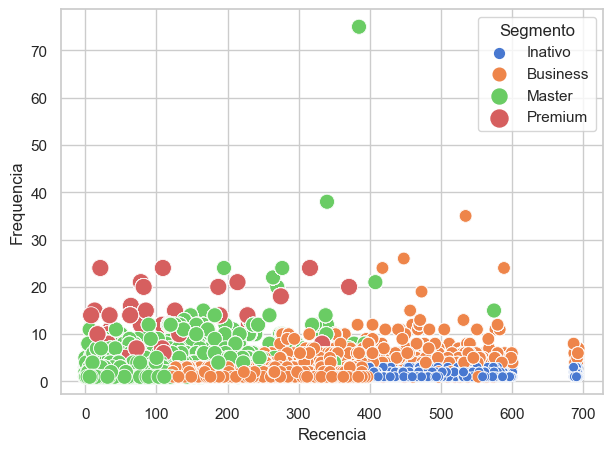

In [141]:
plot_segmento('Recencia','Frequencia', df_final)

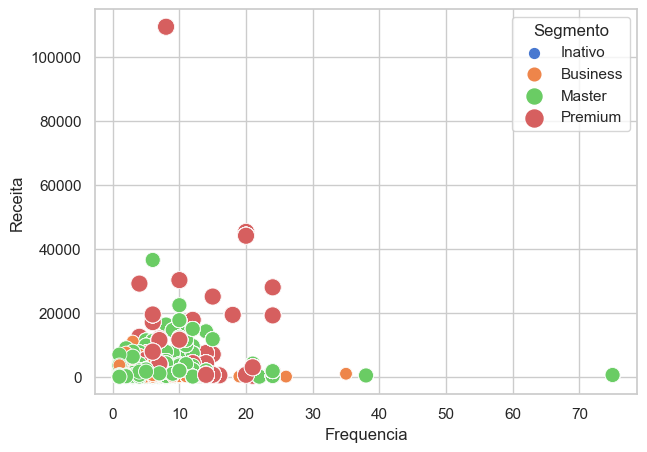

In [142]:
plot_segmento('Frequencia','Receita', df_final)

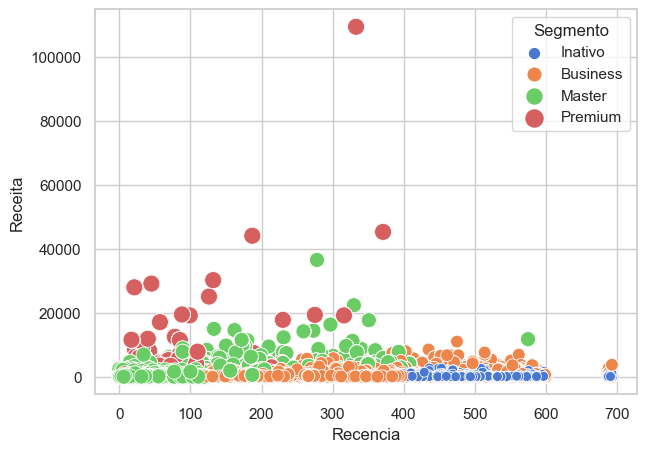

In [143]:
plot_segmento('Recencia','Receita', df_final)

In [144]:
df_final['Segmento'].value_counts()

Segmento
Business    61176
Master      33979
Inativo     18146
Premium       750
Name: count, dtype: int64

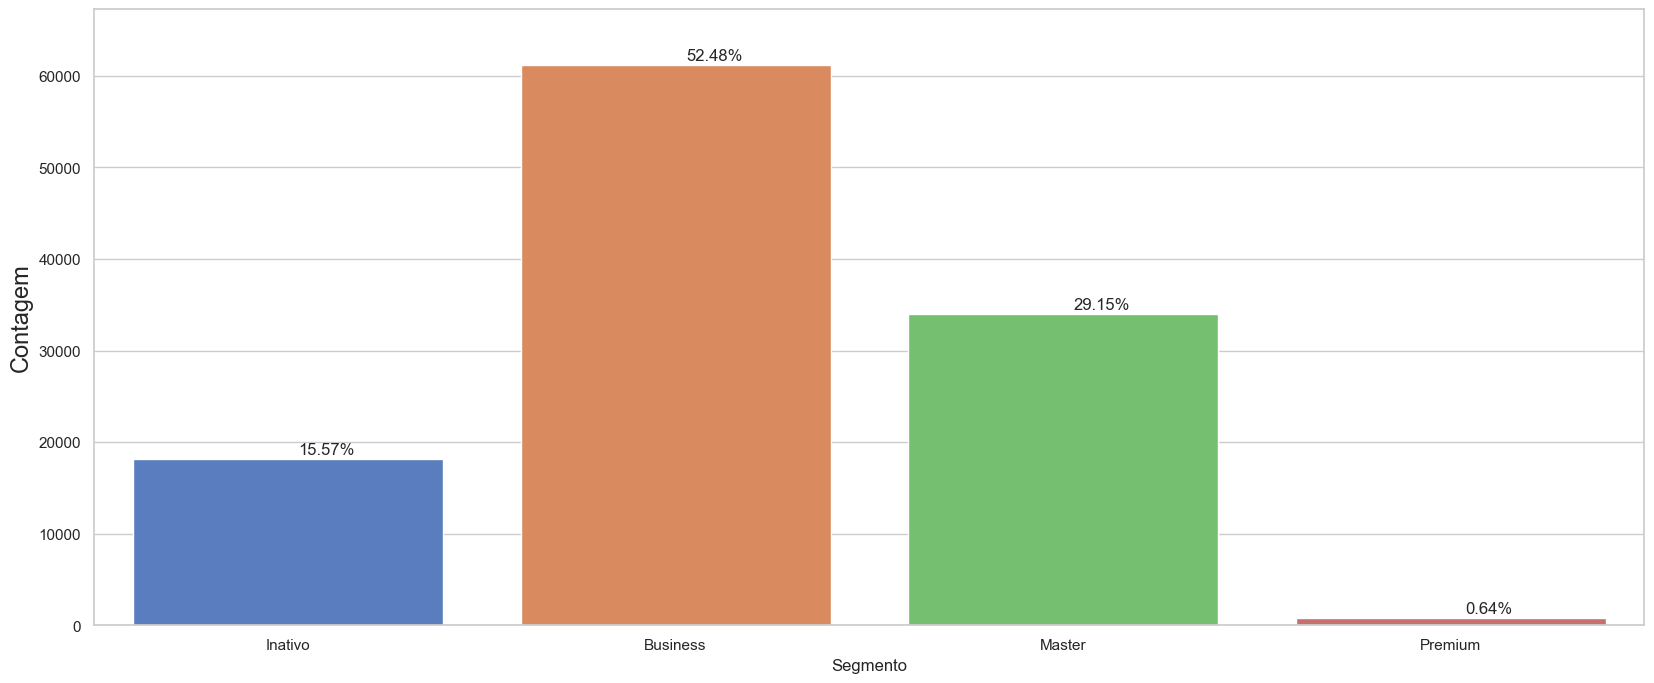

In [145]:
plot_percentual('Segmento',df_final)